### In this notebook we read in data needed for MARBL and generate 1D input files. 
In MOM_input we need to specify the following initial condition files:

In [1]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
%cd /glade/work/mlevy/cesm_inputdata/
IC_FILE               =  xr.open_dataset('ecosys_jan_IC_omip_MOM_tx0.66v1_c221027.nc') #Combination of WOA and other fields from POP includes BGC tracers
TS_IC_FILE            =  xr.open_dataset('/glade/p/cesmdata/cseg/inputdata/ocn/mom/tx0.66v1/woa18_04_initial_conditions.nc',decode_times=False) #T and S fields

MARBL_FESEDFLUX_FILE  =  xr.open_dataset('fesedflux_total_reduce_oxic_tx0.66v1.c211109.nc') #From Matt's notebook based on POP output; only has nlon nlat, not actual  lon/lat
MARBL_FEVENTFLUX_FILE =  xr.open_dataset('feventflux_5gmol_tx0.66v1.c211109.nc') 

#Read in MARBL forcing:
MARBL_FORCING_FILE        =  xr.open_dataset('/glade/work/mlevy/codes/MOM6-examples/gen_forcing_on_tx066v1/MARBL_forcing.nc')

#This takes 2-3 minutes to read in:
%cd /glade/scratch/mlevy/archive/g.e23b09.TL319_t061.G1850MOMMARBL_JRA.006/ocn/hist
OTHER_FLUX_FILE = xr.open_mfdataset('g.e23b09.TL319_t061.G1850MOMMARBL_JRA.006.mom6.h_bgc_monthly_00*',decode_times=False)

#https://github.com/marbl-ecosys/marbl-forcing/tree/master/Fe_sediment_flux
#https://github.com/marbl-ecosys/marbl-forcing/tree/master/initial_conditions
#https://github.com/mnlevy1981/marbl-forcing/blob/MOM_ic/initial_conditions/gen_mom6_omip_IC.ipynb#

/glade/work/mlevy/cesm_inputdata
/glade/scratch/mlevy/archive/g.e23b09.TL319_t061.G1850MOMMARBL_JRA.006/ocn/hist


In [3]:
lat_array = IC_FILE['LAT']
lon_array = IC_FILE['LON']
#print(lat_array)

#We want to extract data at a certain lat/lon point. BATS location is 31.666667N, 64.166667W.
lat =  31.666667 
lon = -64.166667

# First, find the index of the grid point nearest a specific lat/lon.   
abslat = np.abs(lat_array-lat)
abslon = np.abs(lon_array-lon)
c = np.maximum(abslat,abslon, )

([yloc],[xloc]) = np.where(c == np.min(c))

print(yloc,xloc)

313 334


In [21]:
#Finding indices for the Temperature and Salinity data (on a different grid)

ilon_TS = list(TS_IC_FILE.lon.values).index(TS_IC_FILE.sel(lon=lon, method='nearest').lon)
ilat_TS = list(TS_IC_FILE.lat.values).index(TS_IC_FILE.sel(lat=lat, method='nearest').lat)
print(' lon index=',ilon_TS,'\n','lat index=', ilat_TS)

 lon index= 463 
 lat index= 486


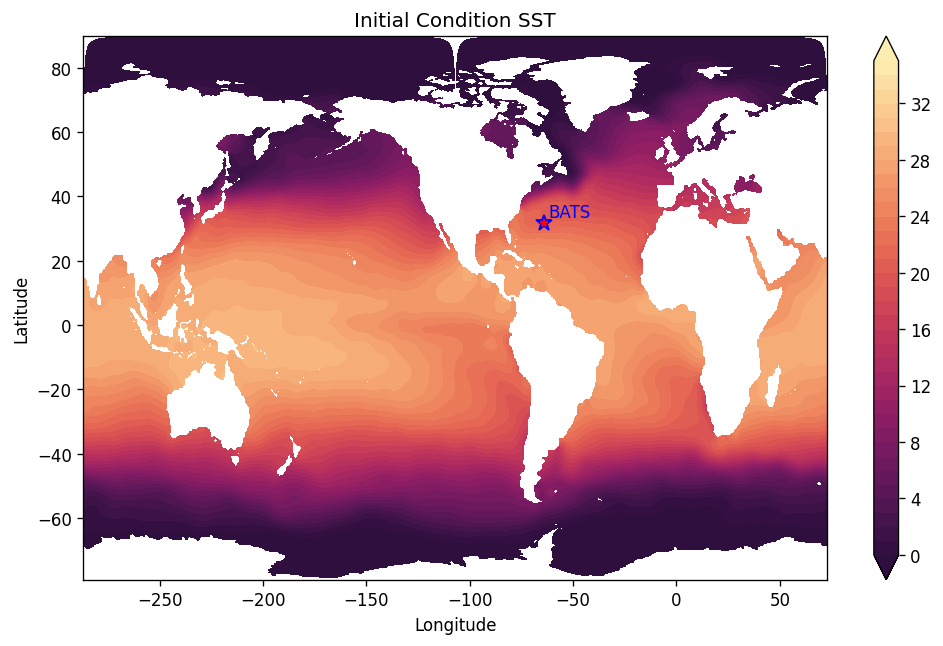

In [11]:
plt.figure(figsize=(10, 6),dpi=120)

plt.contourf(IC_FILE['LON'],IC_FILE['LAT'],IC_FILE['TEMP'][0,:],cmap=cmocean.cm.matter_r,vmin=0,vmax=35,levels=np.linspace(0,35,36),extend='both')
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Initial Condition SST')
plt.plot(lon_array[yloc,xloc],lat_array[yloc,xloc],'*b',markersize=10)
#plt.plot(IC_FILE.LON[yloc,xloc],IC_FILE.LAT[yloc,xloc],'*r',markersize=5)
plt.plot(TS_IC_FILE.lon[ilon_TS],TS_IC_FILE.lat[ilat_TS],'*r',markersize=5)
#plt.plot(MARBL_FORCING_FILE.lon[yloc,xloc],MARBL_FORCING_FILE.lat[yloc,xloc],'*r',markersize=5)

plt.text(lon_array[yloc,xloc]+2,lat_array[yloc,xloc]+2,'BATS',color='b')
plt.show()

In [6]:
MARBL_FORCING_FILE

<xarray.Dataset>
Dimensions:               (nlat: 458, nlon: 540, time: 365)
Coordinates:
  * time                  (time) object 0001-01-01 12:00:00 ... 0001-12-31 12...
    lat                   (nlat, nlon) float64 ...
    lon                   (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    ATM_FINE_DUST_FLUX    (time, nlat, nlon) float64 ...
    ATM_COARSE_DUST_FLUX  (time, nlat, nlon) float64 ...
    ATM_BC_FLUX           (time, nlat, nlon) float64 ...
    U10_SQR               (time, nlat, nlon) float64 ...
    ICE_FRAC              (time, nlat, nlon) float64 ...

In [8]:
IC_FILE_COLUMN               = IC_FILE.isel(NLAT=[yloc-1,yloc], NLON=[xloc-1,xloc]).rename_dims({'NLON':'lon','NLAT':'lat'})#.expand_dims(dim={'LAT':1,'LON':1},axis=[1,2])
MARBL_FESEDFLUX_FILE_COLUMN  = MARBL_FESEDFLUX_FILE.isel(NLAT=[yloc-1,yloc], NLON=[xloc-1,xloc]).rename_dims({'NLON':'lon','NLAT':'lat'})#.expand_dims(dim={'LAT':1,'LON':1},axis=[1,2])
MARBL_FEVENTFLUX_FILE_COLUMN = MARBL_FEVENTFLUX_FILE.isel(NLAT=[yloc-1,yloc], NLON=[xloc-1,xloc]).rename_dims({'NLON':'lon','NLAT':'lat'})#.expand_dims(dim={'LAT':1,'LON':1},axis=[1,2])  #leaving braces around [xloc] and [yloc] preserves that dimension
OTHER_FLUX_FILE_COLUMN       = OTHER_FLUX_FILE.isel(time=range(0,12),xh=[xloc-1,xloc],yh=[yloc-1,yloc]).rename_dims({'xh':'lon','yh':'lat'})

TS_IC_FILE_COLUMN            = TS_IC_FILE.isel(lat=[ilat_TS-1,ilat_TS],lon=[ilon_TS-1,ilon_TS])

MARBL_FORCING_FILE_COLUMN    = MARBL_FORCING_FILE.isel(nlat=[yloc-1,yloc], nlon=[xloc-1,xloc])#.expand_dims(dim={'LAT':1,'LON':1},axis=[1,2])

#print(IC_FILE_COLUMN)
# print( MARBL_FESEDFLUX_FILE_COLUMN)
# print(MARBL_FEVENTFLUX_FILE)
#print(OTHER_FLUX_FILE_COLUMN)


In [12]:
keys_flux = ['ATM_BLACK_CARBON_FLUX_CPL','SEAICE_BLACK_CARBON_FLUX_CPL','ATM_FINE_DUST_FLUX_CPL','ATM_COARSE_DUST_FLUX_CPL','SEAICE_DUST_FLUX_CPL']
FLUX_FILE_COLUMN = OTHER_FLUX_FILE_COLUMN[keys_flux]
#print(OTHER_FLUX_FILE_COLUMN)
print(FLUX_FILE_COLUMN)

<xarray.Dataset>
Dimensions:                       (lat: 2, lon: 2, time: 12)
Coordinates:
    xh                            (lon) float64 -64.67 -64.0
    yh                            (lat) float64 31.18 31.75
  * time                          (time) float64 15.5 45.0 74.5 ... 319.0 349.5
Dimensions without coordinates: lat, lon
Data variables:
    ATM_BLACK_CARBON_FLUX_CPL     (time, lat, lon) float64 dask.array<chunksize=(1, 2, 2), meta=np.ndarray>
    SEAICE_BLACK_CARBON_FLUX_CPL  (time, lat, lon) float64 dask.array<chunksize=(1, 2, 2), meta=np.ndarray>
    ATM_FINE_DUST_FLUX_CPL        (time, lat, lon) float64 dask.array<chunksize=(1, 2, 2), meta=np.ndarray>
    ATM_COARSE_DUST_FLUX_CPL      (time, lat, lon) float64 dask.array<chunksize=(1, 2, 2), meta=np.ndarray>
    SEAICE_DUST_FLUX_CPL          (time, lat, lon) float64 dask.array<chunksize=(1, 2, 2), meta=np.ndarray>
Attributes:
    filename:          g.e23b09.TL319_t061.G1850MOMMARBL_JRA.006.mom6.h_bgc_m...
    title:        

Text(0.5, 1.0, 'Fluxes contributing to iron flux, 1 years of monthly averages')

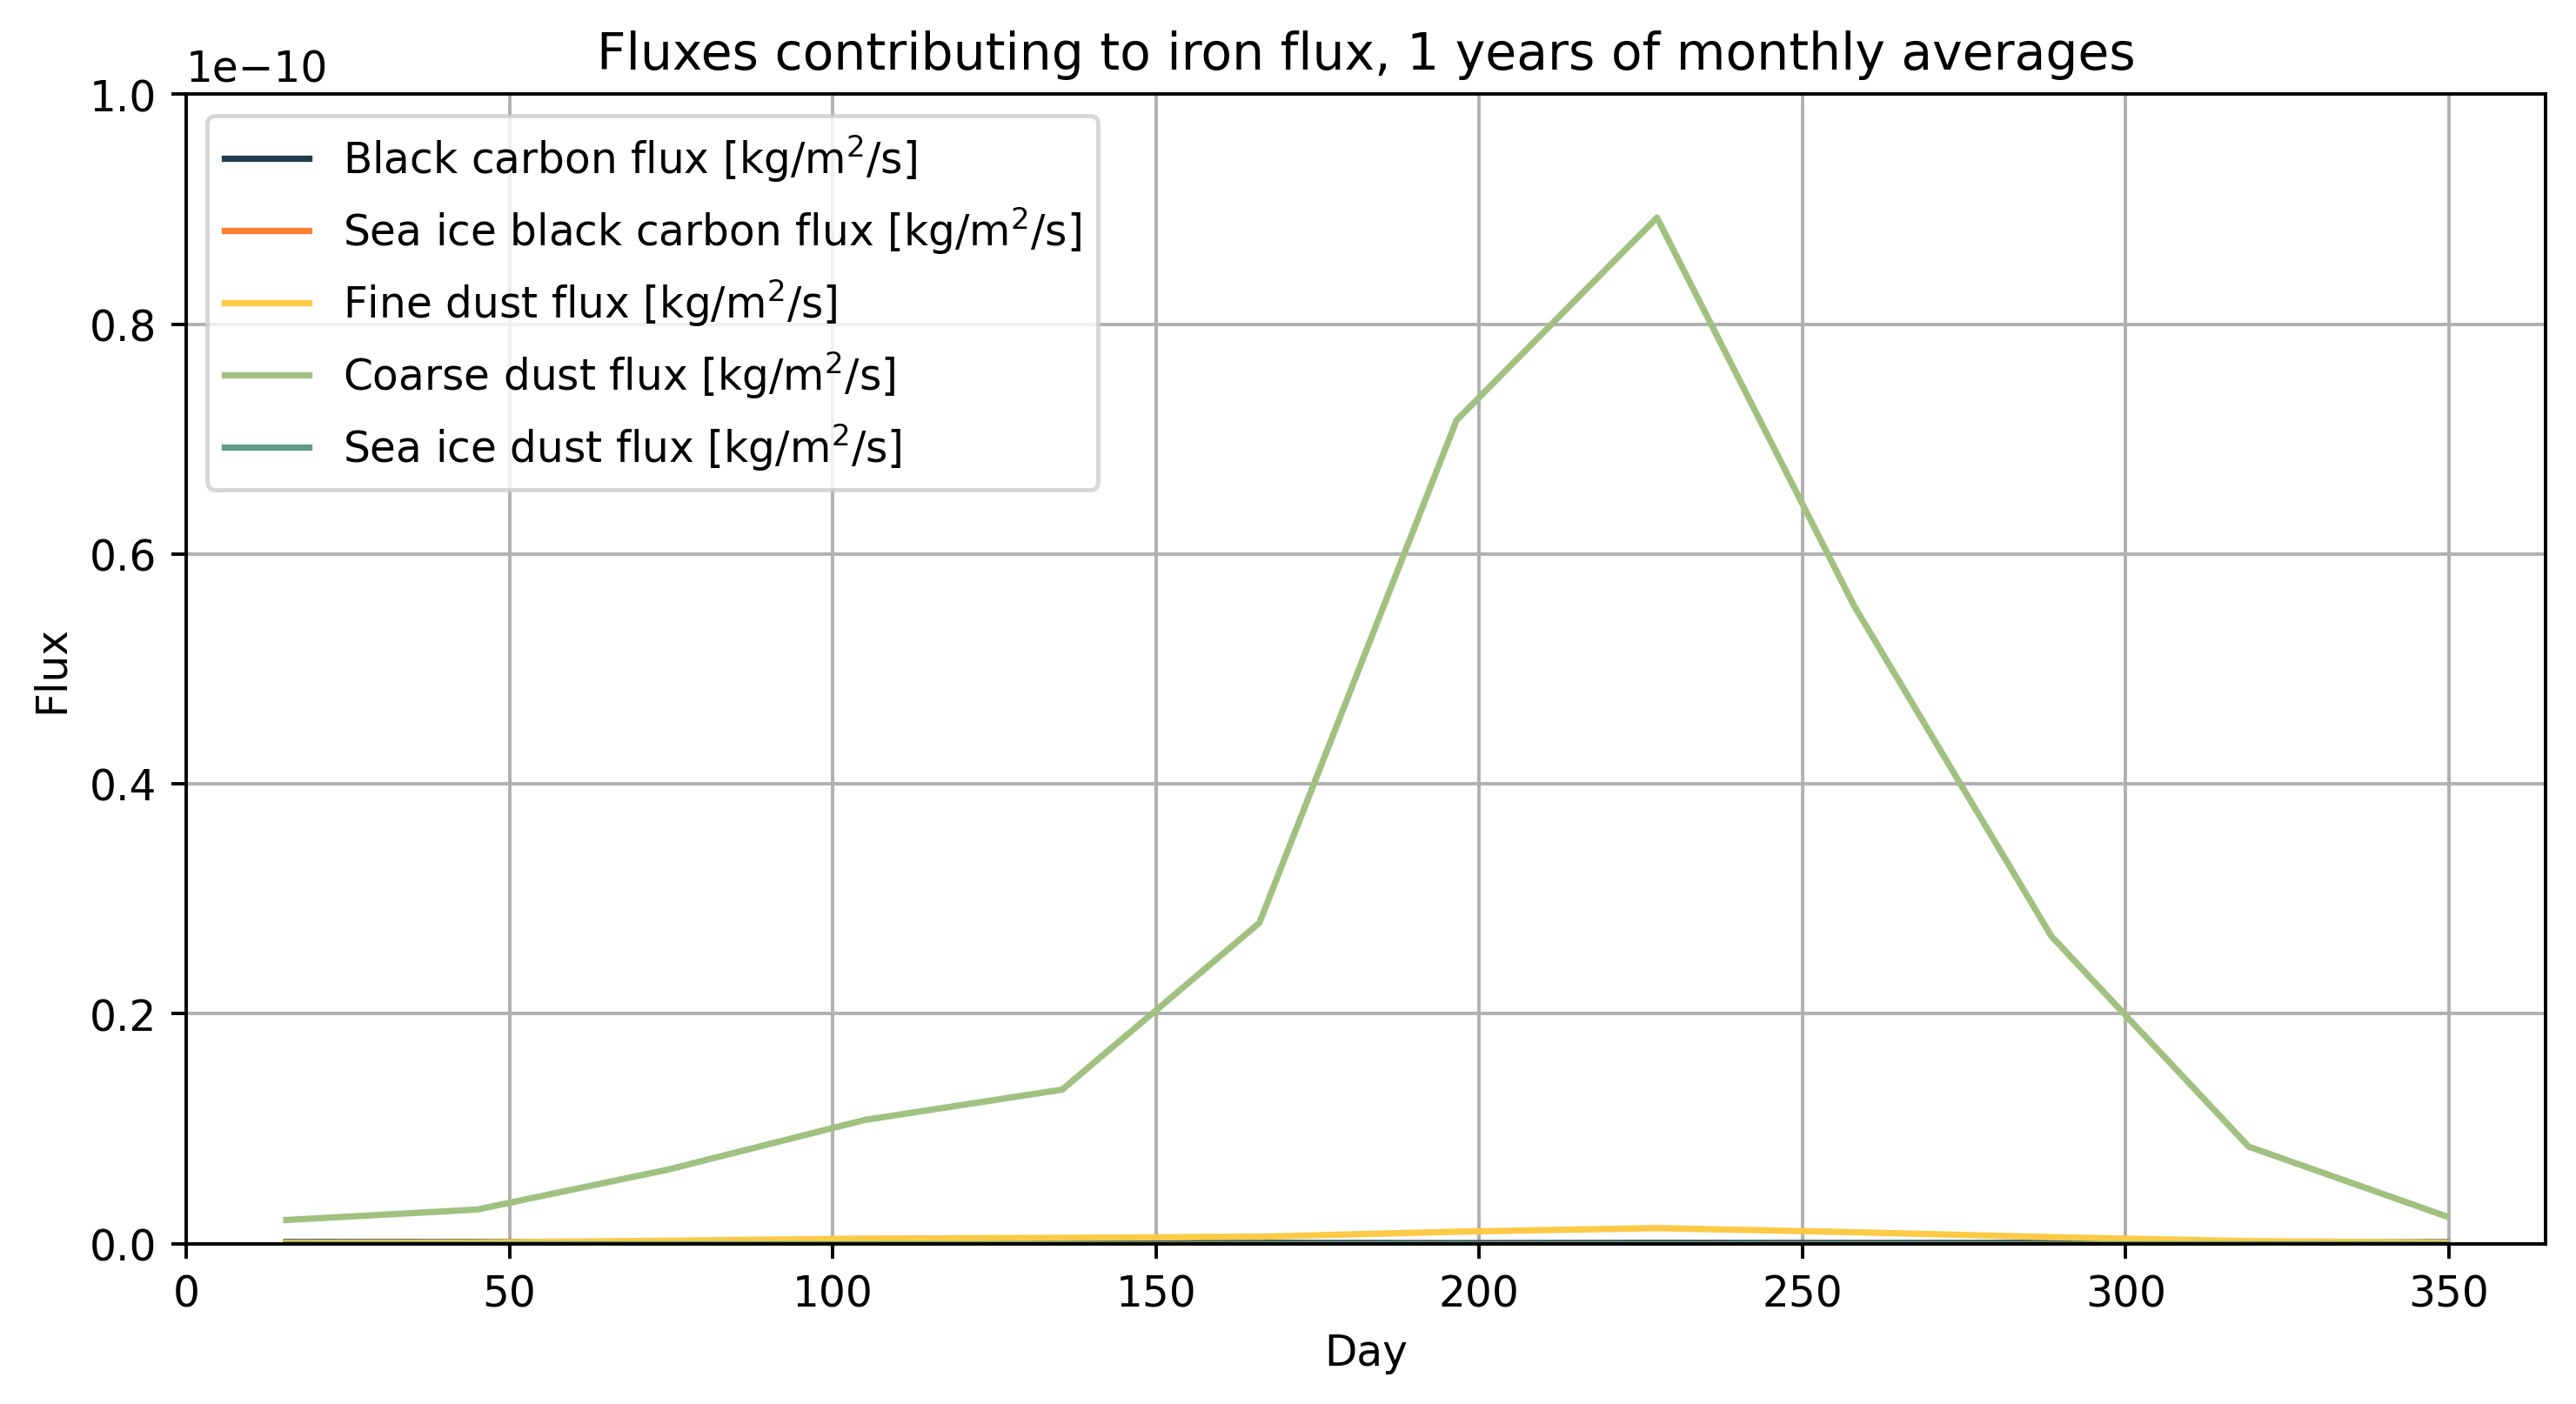

In [13]:
#FLUX_FILE_COLUMN
#IC_FILE_COLUMN

plt.figure(figsize=(10, 5),dpi=350)
plt.plot(FLUX_FILE_COLUMN.time,FLUX_FILE_COLUMN.ATM_BLACK_CARBON_FLUX_CPL[:,0,0],label='Black carbon flux [kg/m$^2$/s]',color='#233d4d')
plt.plot(FLUX_FILE_COLUMN.time,FLUX_FILE_COLUMN.SEAICE_BLACK_CARBON_FLUX_CPL[:,0,0],label='Sea ice black carbon flux [kg/m$^2$/s]',color='#fe7f2d')
plt.plot(FLUX_FILE_COLUMN.time,FLUX_FILE_COLUMN.ATM_FINE_DUST_FLUX_CPL[:,0,0],label='Fine dust flux [kg/m$^2$/s]',color='#fcca46')
plt.plot(FLUX_FILE_COLUMN.time,FLUX_FILE_COLUMN.ATM_COARSE_DUST_FLUX_CPL[:,0,0],label='Coarse dust flux [kg/m$^2$/s]',color='#a1c181')
plt.plot(FLUX_FILE_COLUMN.time,FLUX_FILE_COLUMN.SEAICE_DUST_FLUX_CPL[:,0,0],label='Sea ice dust flux [kg/m$^2$/s]',color='#619b8a')
plt.legend()
plt.ylabel('Flux')
plt.xlabel('Day')
plt.xlim([0,365]); plt.ylim([0,10e-11])
plt.grid()
plt.title('Fluxes contributing to iron flux, 1 years of monthly averages')

In [14]:
#FLUX_FILE_COLUMN

##Modifications so that we use Kristen's 4p2z model:
print(IC_FILE_COLUMN)

IC_FILE_COLUMN['coccoC'] = IC_FILE_COLUMN['spC'] * 0.07
IC_FILE_COLUMN['coccoFe'] = IC_FILE_COLUMN['spFe'] * 0.07
IC_FILE_COLUMN['coccoP'] = IC_FILE_COLUMN['spP'] * 0.07
IC_FILE_COLUMN['coccoChl'] = IC_FILE_COLUMN['spChl'] * 0.07

# and then reduce the sp pools so biomass is conserved:
IC_FILE_COLUMN['spC'] = IC_FILE_COLUMN['spC'] * 0.93
IC_FILE_COLUMN['spFe'] = IC_FILE_COLUMN['spFe'] * 0.93
IC_FILE_COLUMN['spP'] = IC_FILE_COLUMN['spP'] * 0.93
IC_FILE_COLUMN['spChl'] = IC_FILE_COLUMN['spChl'] * 0.93

#For coccoCaCO3, just set that equal to spCaCO3:
IC_FILE_COLUMN['coccoCaCO3'] = IC_FILE_COLUMN['spCaCO3']
#and then drop spCaCO3 (it's not a tracer in Kristen's 4p2z version of MARBL)
IC_FILE_COLUMN = IC_FILE_COLUMN.drop(['spCaCO3'])

IC_FILE_COLUMN['mesozooC'] = IC_FILE_COLUMN['zooC'] * 0.56
IC_FILE_COLUMN['microzooC'] = IC_FILE_COLUMN['zooC'] * 0.44
#and then drop zooC:
IC_FILE_COLUMN = IC_FILE_COLUMN.drop(['zooC'])


for var in ['coccoC','coccoFe','coccoP','coccoChl','spC','spFe','spP','spChl','coccoCaCO3','mesozooC','microzooC']:
    IC_FILE_COLUMN[var].encoding['_FillValue'] = -1.e34
    
print(IC_FILE_COLUMN)

<xarray.Dataset>
Dimensions:      (DEPTH: 102, lat: 2, lon: 2)
Coordinates:
  * DEPTH        (DEPTH) float64 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
    LON          (lat, lon) float64 -64.68 -64.02 -64.69 -64.02
    LAT          (lat, lon) float64 31.1 31.1 31.66 31.66
Dimensions without coordinates: lat, lon
Data variables:
    TEMP         (DEPTH, lat, lon) float64 ...
    SALT         (DEPTH, lat, lon) float64 ...
    NO3          (DEPTH, lat, lon) float64 ...
    PO4          (DEPTH, lat, lon) float64 ...
    SiO3         (DEPTH, lat, lon) float64 ...
    O2           (DEPTH, lat, lon) float64 ...
    DIC          (DEPTH, lat, lon) float64 ...
    ALK          (DEPTH, lat, lon) float64 ...
    spC          (DEPTH, lat, lon) float64 ...
    spChl        (DEPTH, lat, lon) float64 ...
    spFe         (DEPTH, lat, lon) float64 ...
    spP          (DEPTH, lat, lon) float64 ...
    spCaCO3      (DEPTH, lat, lon) float64 ...
    diatC        (DEPTH, lat, lon) float64 ...
    diat

In [15]:
keys = list(IC_FILE_COLUMN.keys())
len(keys)

#keys

39

In [16]:
keys

['TEMP',
 'SALT',
 'NO3',
 'PO4',
 'SiO3',
 'O2',
 'DIC',
 'ALK',
 'spC',
 'spChl',
 'spFe',
 'spP',
 'diatC',
 'diatChl',
 'diatFe',
 'diatP',
 'diatSi',
 'diazC',
 'diazChl',
 'diazFe',
 'diazP',
 'DOC',
 'DOCr',
 'DON',
 'DONr',
 'DOP',
 'DOPr',
 'NH4',
 'Fe',
 'Lig',
 'DIC_ALT_CO2',
 'ALK_ALT_CO2',
 'coccoC',
 'coccoFe',
 'coccoP',
 'coccoChl',
 'coccoCaCO3',
 'mesozooC',
 'microzooC']

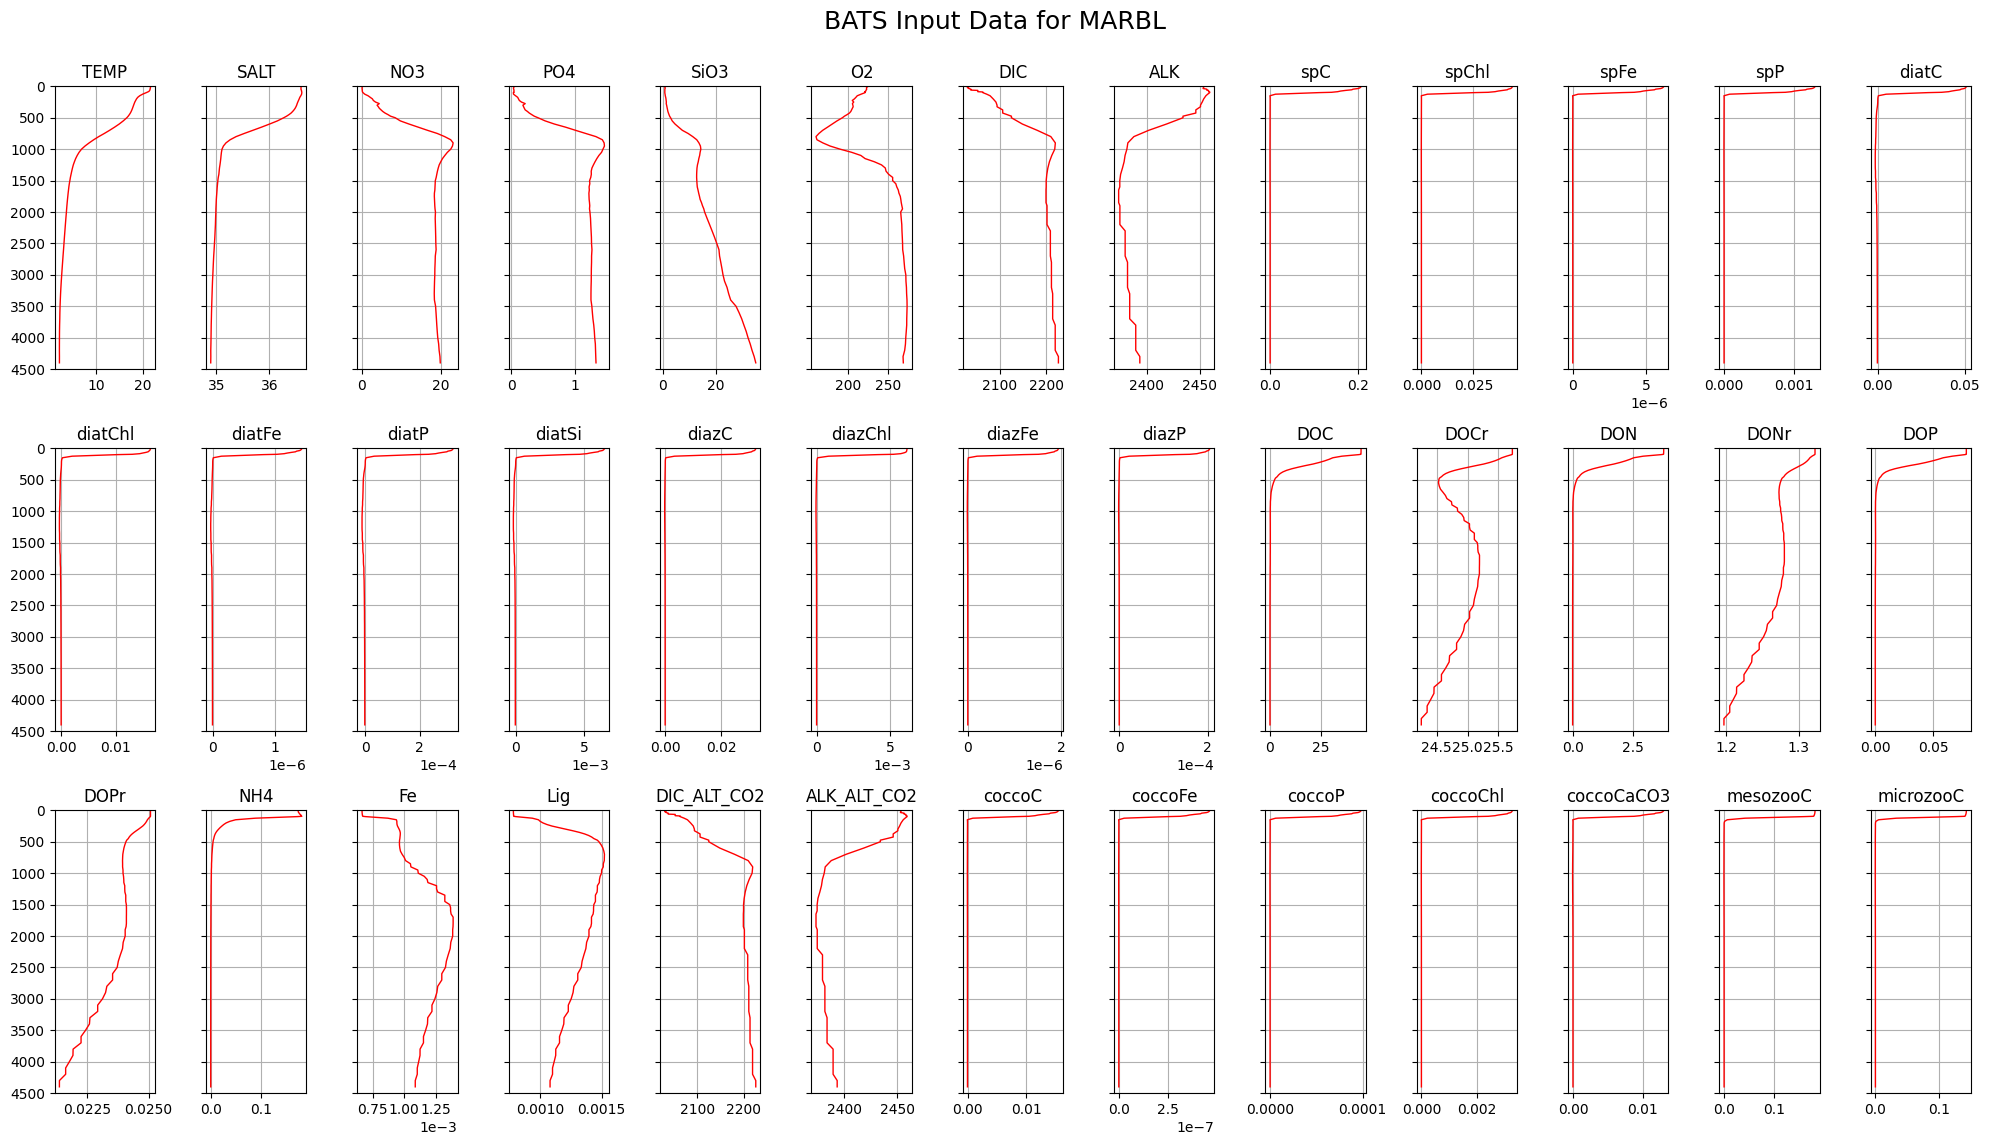

In [22]:
fig, axs = plt.subplots(nrows=3, ncols=13, figsize=(20, 12), sharey = True, dpi=100)
fig.suptitle("BATS Input Data for MARBL", fontsize=18, y=0.95)

for key, ax in zip(keys, axs.ravel()):
    ax.plot(IC_FILE_COLUMN[key][:,0,0],IC_FILE_COLUMN.DEPTH,'r',linewidth=1)

    ax.set_ylim([4500, 0])
    ax.set_title(key)
    ax.grid()
    #ax.set_xlabel(IC_FILE_COLUMN[key].units)
    ax.ticklabel_format(style='plain', axis='x')
    if key in ['spFe','diatFe','diatSi','diazChl','diatP','diazFe','diazP','Fe','coccoFe']:
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

#fig.delaxes(axs[-1][-1])
#fig.delaxes(axs[-1][-2])
fig.tight_layout(rect=[0, 0, 1, 0.95])


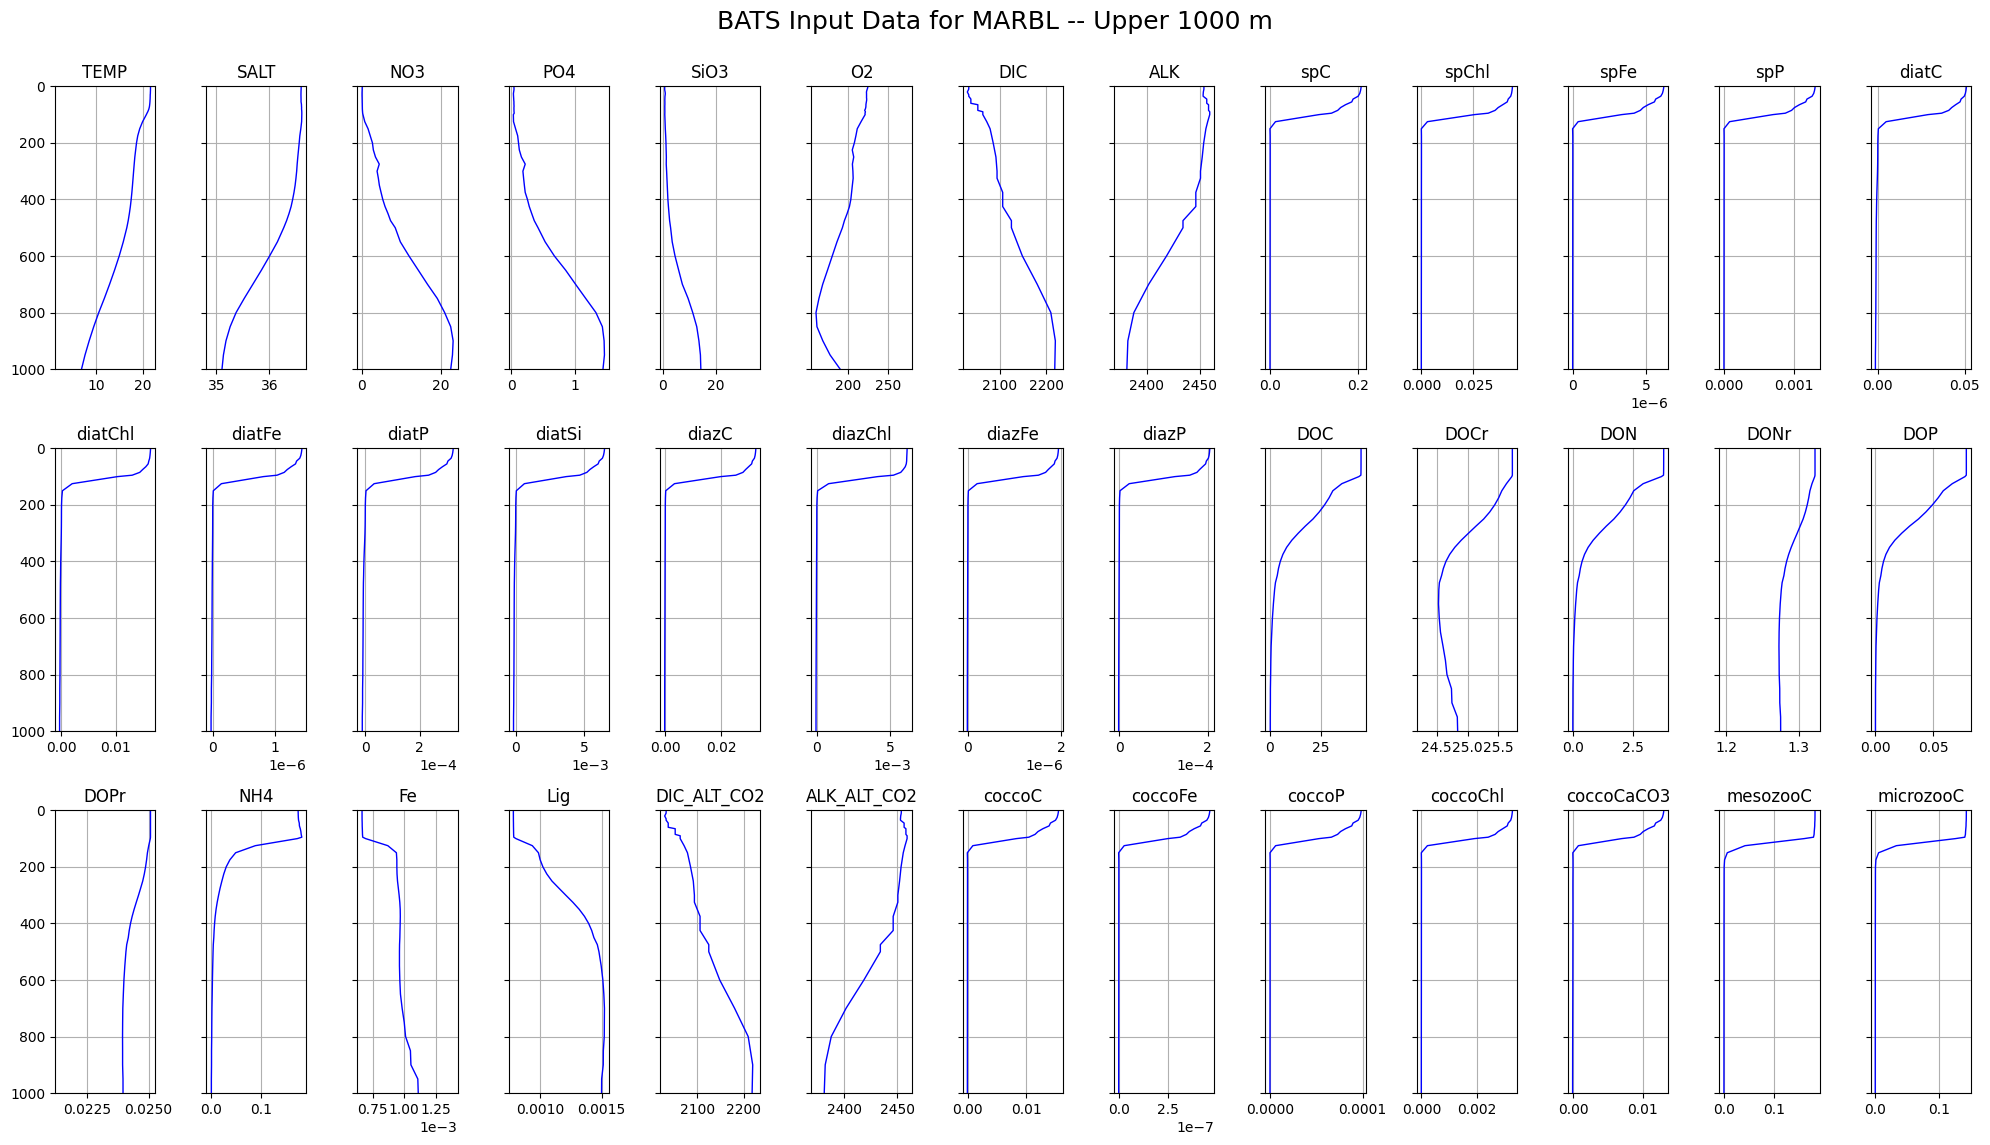

In [23]:
fig, axs = plt.subplots(nrows=3, ncols=13, figsize=(20, 12), sharey = True, dpi=100)
fig.suptitle("BATS Input Data for MARBL -- Upper 1000 m", fontsize=18, y=0.95)

for key, ax in zip(keys, axs.ravel()):
    ax.plot(IC_FILE_COLUMN[key][:,0,0],IC_FILE_COLUMN.DEPTH,'b',linewidth=1)

    ax.set_ylim([1000, 0])
    ax.set_title(key)
    ax.grid()
    #ax.set_xlabel(IC_FILE_COLUMN[key].units)
    ax.ticklabel_format(style='plain', axis='x')
    if key in ['spFe','diatFe','diatSi','diazChl','diatP','diazFe','diazP','Fe','coccoFe']:
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

#fig.delaxes(axs[-1][-1])
#fig.delaxes(axs[-1][-2])
fig.tight_layout(rect=[0, 0, 1, 0.95])

In [26]:
MARBL_FORCING_FILE_COLUMN

<xarray.Dataset>
Dimensions:               (nlat: 2, nlon: 2, time: 365)
Coordinates:
  * time                  (time) object 0001-01-01 12:00:00 ... 0001-12-31 12...
    lat                   (nlat, nlon) float64 31.1 31.1 31.66 31.66
    lon                   (nlat, nlon) float64 295.3 296.0 295.3 296.0
Dimensions without coordinates: nlat, nlon
Data variables:
    ATM_FINE_DUST_FLUX    (time, nlat, nlon) float64 5.759e-14 ... 5.998e-14
    ATM_COARSE_DUST_FLUX  (time, nlat, nlon) float64 1.86e-12 ... 1.879e-12
    ATM_BC_FLUX           (time, nlat, nlon) float64 1.22e-13 ... 1.3e-13
    U10_SQR               (time, nlat, nlon) float64 22.03 20.39 ... 172.8 172.8
    ICE_FRAC              (time, nlat, nlon) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0

## Finally save the MARBL column input files within the BATS input directory in single_column example directory

In [28]:
%cd /glade/u/home/eyankovsky/MOM6-examples/ocean_only/single_column/INPUT/BATS/
%rm IC_FILE_COLUMN.nc MARBL_FESEDFLUX_FILE_COLUMN.nc MARBL_FEVENTFLUX_FILE_COLUMN.nc TS_IC_FILE_COLUMN.nc MARBL_FORCING_FILE_COLUMN.nc

IC_FILE_COLUMN.to_netcdf('IC_FILE_COLUMN.nc', 'w')

TS_IC_FILE_COLUMN.to_netcdf('TS_IC_FILE_COLUMN.nc', 'w')

MARBL_FESEDFLUX_FILE_COLUMN.to_netcdf('MARBL_FESEDFLUX_FILE_COLUMN.nc','w')
MARBL_FEVENTFLUX_FILE_COLUMN.to_netcdf('MARBL_FEVENTFLUX_FILE_COLUMN.nc','w')

FLUX_FILE_COLUMN.time.attrs['modulo'] = ' '
FLUX_FILE_COLUMN.to_netcdf('FLUX_FILE_COLUMN.nc','w',unlimited_dims='time')

MARBL_FORCING_FILE_COLUMN.time.attrs['modulo'] = ' '
MARBL_FORCING_FILE_COLUMN.to_netcdf('MARBL_FORCING_FILE_COLUMN.nc','w',unlimited_dims='time')

%ls



/glade/u/home/eyankovsky/MOM6-examples/ocean_only/single_column/INPUT/BATS
FLUX_FILE_COLUMN.nc         MARBL_FESEDFLUX_FILE_COLUMN.nc
forcing_monthly.nc          MARBL_FEVENTFLUX_FILE_COLUMN.nc
forcing.nc                  MARBL_FORCING_FILE_COLUMN.nc
IC_FILE_COLUMN.nc           MOM_override
IC_FILE_COLUMN_original.nc  restoring_3D.nc
IC_FILE_COLUMN_test.nc      TS_IC_FILE_COLUMN.nc
ICs.nc                      WOA_column.nc
itides.nc


<xarray.Dataset>
Dimensions:  (depth: 102)
Coordinates:
    lat      float64 31.62
    lon      float64 -64.12
    time     float32 372.5
  * depth    (depth) float64 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
Data variables:
    s_an     (depth) float32 ...
    theta0   (depth) float32 ...
Attributes:
    title:           T and S from WOA filled over continents
    WOA_resolution:  04, 01 (1 deg), 04 (0.25 deg)
    author:          Gustavo Marques (gmarques@ucar.edu)
    date:            2020-06-16T16:35:25.114337
    created_using:   create_filled_ic.py -path_out ./ -author Gustavo Marques...
    url:             create_filled_ic.py can be found at https://github.com/N...
    git_hash:        b'4b2f95e'


In [13]:
testing_IC_FILE = xr.open_dataset('IC_FILE_COLUMN.nc')
#testing_ICs = xr.open_dataset('ICs.nc')
testing_IC_FILE

<xarray.Dataset>
Dimensions:      (DEPTH: 102, lat: 2, lon: 2)
Coordinates:
  * DEPTH        (DEPTH) float64 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
    LON          (lat, lon) float64 ...
    LAT          (lat, lon) float64 ...
Dimensions without coordinates: lat, lon
Data variables:
    TEMP         (DEPTH, lat, lon) float64 ...
    SALT         (DEPTH, lat, lon) float64 ...
    NO3          (DEPTH, lat, lon) float64 ...
    PO4          (DEPTH, lat, lon) float64 ...
    SiO3         (DEPTH, lat, lon) float64 ...
    O2           (DEPTH, lat, lon) float64 ...
    DIC          (DEPTH, lat, lon) float64 ...
    ALK          (DEPTH, lat, lon) float64 ...
    spC          (DEPTH, lat, lon) float64 ...
    spChl        (DEPTH, lat, lon) float64 ...
    spFe         (DEPTH, lat, lon) float64 ...
    spP          (DEPTH, lat, lon) float64 ...
    spCaCO3      (DEPTH, lat, lon) float64 ...
    diatC        (DEPTH, lat, lon) float64 ...
    diatChl      (DEPTH, lat, lon) float64 ...
    diatFe       (DEPTH, lat, lon) float64 ...
    diatP        (DEPTH, lat, lon) float64 ...
    diatSi       (DEPTH, lat, lon) float64 ...
    diazC        (DEPTH, lat, lon) float64 ...
    diazChl      (DEPTH, lat, lon) float64 ...
    diazFe       (DEPTH, lat, lon) float64 ...
    diazP        (DEPTH, lat, lon) float64 ...
    zooC         (DEPTH, lat, lon) float64 ...
    DOC          (DEPTH, lat, lon) float64 ...
    DOCr         (DEPTH, lat, lon) float64 ...
    DON          (DEPTH, lat, lon) float64 ...
    DONr         (DEPTH, lat, lon) float64 ...
    DOP          (DEPTH, lat, lon) float64 ...
    DOPr         (DEPTH, lat, lon) float64 ...
    NH4          (DEPTH, lat, lon) float64 ...
    Fe           (DEPTH, lat, lon) float64 ...
    Lig          (DEPTH, lat, lon) float64 ...
    DIC_ALT_CO2  (DEPTH, lat, lon) float64 ...
    ALK_ALT_CO2  (DEPTH, lat, lon) float64 ...
Attributes:
    date_created:     Thu Mar 14 14:15:56 MDT 2019
    Createdby:        ESMF_regridding.ncl
    Conventions:      SCRIP
    title:            tx0.66v1 Grid
    history:          created by github.com/marbl-ecosys/marbl-forcing/tree/e...
    input_file_list:  /glade/p/cesm/bgcwg/OMIPinit/woa13_temperature_OMIPinit...

In [53]:
(1/1.5854895991882293e-08)/86400/365

2.0

## Restoring timescale

In [16]:
restoring = xr.open_dataset('/glade/p/cesmdata/cseg/inputdata/ocn/pop/gx1v6/forcing/ecosys_restore_inv_tau_POP_gx1v6_20170125.nc')

#print(restoring.RESTORE_INV_TAU )

print('max restoring inverse timescale in years is:',(1/(np.nanmax(restoring.RESTORE_INV_TAU)))/86400/365)

max restoring inverse timescale in years is: 2.0


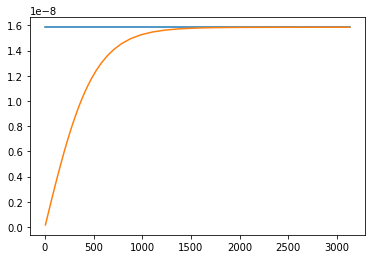

In [17]:
#plt.figure(figsize=(3, 2),dpi=150)

plt.plot(restoring.depth,restoring.RESTORE_INV_TAU[:,100,100])


plt.plot(restoring.depth,restoring.RESTORE_INV_TAU[:,100,100]*np.tanh(restoring.depth/500))


In [18]:
restoring['RESTORE_INV_TAU'] = restoring.RESTORE_INV_TAU*np.tanh(restoring.depth/500)
restoring['RESTORE_INV_TAU_MARGINAL_SEA_ONLY'] = restoring.RESTORE_INV_TAU_MARGINAL_SEA_ONLY*np.tanh(restoring.depth/500)


In [19]:
%cd /glade/u/home/eyankovsky/MOM6-examples/ocean_only/single_column/KPP_MARBL/INPUT/BATS/
%rm restoring_3D.nc

restoring.to_netcdf('restoring_3D.nc','w')
test = xr.open_dataset('restoring_3D.nc')
print(test)

/glade/u/home/eyankovsky/MOM6-examples/ocean_only/single_column/INPUT/BATS
<xarray.Dataset>
Dimensions:                            (depth: 60, nlat: 384, nlon: 320)
Coordinates:
  * depth                              (depth) float64 5.0 15.0 ... 5.375e+03
    TLONG                              (nlat, nlon) float64 ...
    TLAT                               (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    KMT                                (nlat, nlon) int32 ...
    REGION_MASK                        (nlat, nlon) int32 ...
    RESTORE_INV_TAU                    (depth, nlat, nlon) float64 ...
    RESTORE_INV_TAU_MARGINAL_SEA_ONLY  (depth, nlat, nlon) float64 ...
Attributes:
    comment:  created by /glade/u/home/klindsay/ncl/gen_ecosys_restore_inv_ta...


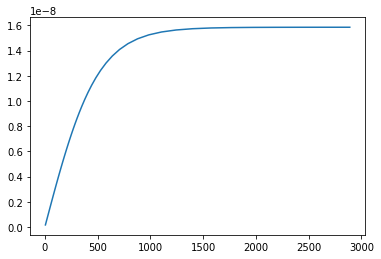

In [20]:
plt.plot(test.depth,test.RESTORE_INV_TAU[:,50,50])
